In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
filename = 'P:/CoxaAI/preprocess_data/csv_detection_info/sortering 3/BB.csv'
filename_clean = 'P:/CoxaAI/preprocess_data/csv_detection_info_clean/sortering 3/BB.csv'
saved_cropped_image = 'P:/CoxaAI/preprocess_data/cropped/sortering 3/BB'

In [3]:
detection_df = pd.read_csv(filename)

In [4]:
detection_df

base_path  \
0    P:/CoxaAI/Sortering 3/BB   
1    P:/CoxaAI/Sortering 3/BB   
2    P:/CoxaAI/Sortering 3/BB   
3    P:/CoxaAI/Sortering 3/BB   
4    P:/CoxaAI/Sortering 3/BB   
..                        ...   
205  P:/CoxaAI/Sortering 3/BB   
206  P:/CoxaAI/Sortering 3/BB   
207  P:/CoxaAI/Sortering 3/BB   
208  P:/CoxaAI/Sortering 3/BB   
209  P:/CoxaAI/Sortering 3/BB   

                                              filename parent_name  \
0    1.3.51.0.7.3593673385.13306.49742.33483.3441.6...  1-23006207   
1    1.3.51.0.7.3593673385.13306.49742.33483.3441.6...  1-23006207   
2    1.3.51.0.7.706224279.6159.12608.37693.18964.35...  1-23006207   
3    1.3.51.0.7.706224279.6159.12608.37693.18964.35...  1-23006207   
4    1.2.840.114387.2042622560.16990.19006.40964.95...  1-23006223   
..                                                 ...         ...   
205  1.2.392.200036.9107.500.220.12246.20230127.936...  1-23009573   
206           1.2.276.0.95.17743.20230127.121153.0.dcm  1-23009599   
207           1.2.276.0.95.17743.20230127.121153.0.dcm  1-23009599   
208  1.2.392.200036.9125.9.0.4129536673.50372312.10...  1-23009656   
209  1.2.392.200036.9125.9.0.4129536673.50372312.10...  1-23009656   

                                             crop_name  ax0_min  ax0_max  \
0    1.3.51.0.7.3593673385.13306.49742.33483.3441.6...     1530     1792   
1    1.3.51.0.7.3593673385.13306.49742.33483.3441.6...     1557     1830   
2    1.3.51.0.7.706224279.6159.12608.37693.18964.35...     1668     1938   
3    1.3.51.0.7.706224279.6159.12608.37693.18964.35...     1661     1924   
4    1.2.840.114387.2042622560.16990.19006.40964.95...      829      971   
..                                                 ...      ...      ...   
205  1.2.392.200036.9107.500.220.12246.20230127.936...      856      996   
206        1.2.276.0.95.17743.20230127.121153.0.dcm_h1     1464     1613   
207        1.2.276.0.95.17743.20230127.121153.0.dcm_h2     1467     1615   
208  1.2.392.200036.9125.9.0.4129536673.50372312.10...     1268     1449   
209  1.2.392.200036.9125.9.0.4129536673.50372312.10...     1255     1424   

     ax1_min  ax1_max  confidence  is_rotated  diagnosis diagnosis_raw  
0       2105     2295    0.967320       False          1            BB  
1       1213     1406    0.951314       False          1            BB  
2       1348     1540    0.976187       False          1            BB  
3       2240     2432    0.957437       False          1            BB  
4        950     1053    0.989528       False          1            BB  
..       ...      ...         ...         ...        ...           ...  
205     1228     1329    0.978454       False          1            BB  
206     1172     1276    0.994964       False          1            BB  
207     1718     1825    0.992304       False          1            BB  
208      847      974    0.971436       False          1            BB  
209     1432     1556    0.934253       False          1            BB  

[210 rows x 12 columns]

### [Optional] Sort by confidence (filter out bad prediction)

In [5]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [6]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([124, 125, 127], dtype='int64')

Note that there are 3 cases that are not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [7]:
# plot every 9 of them

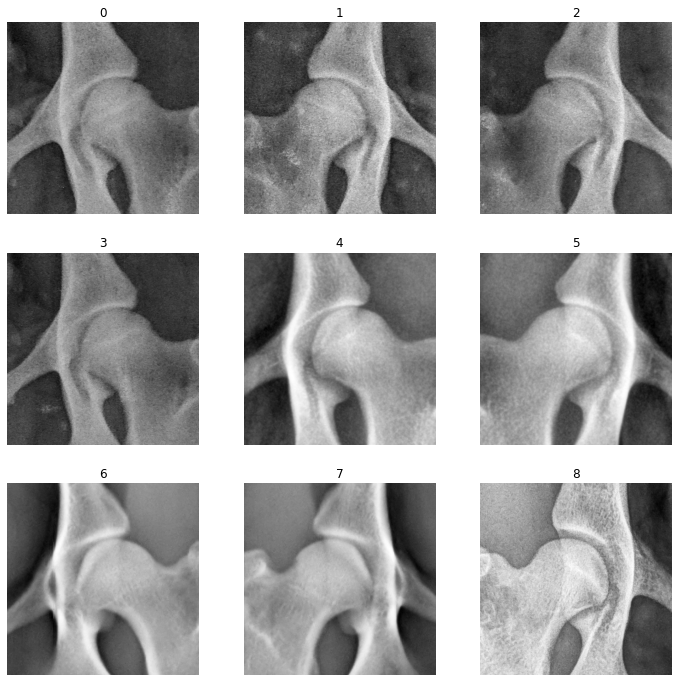

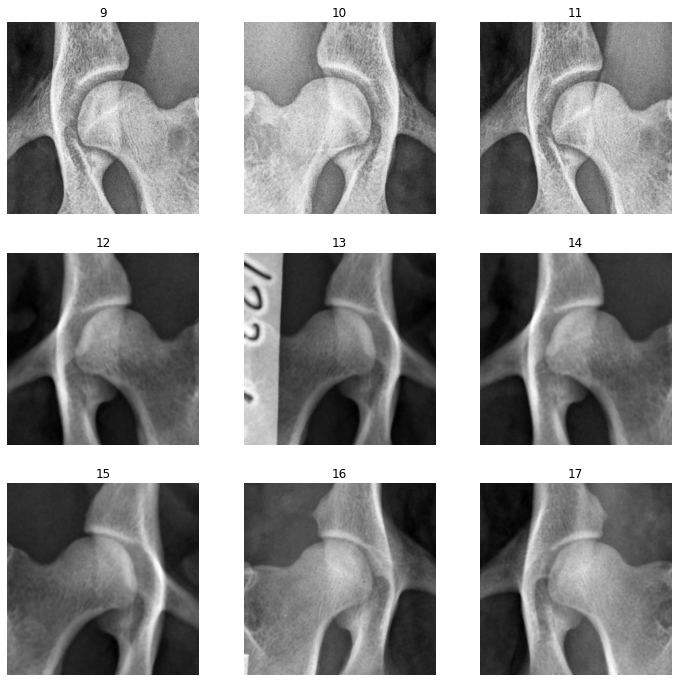

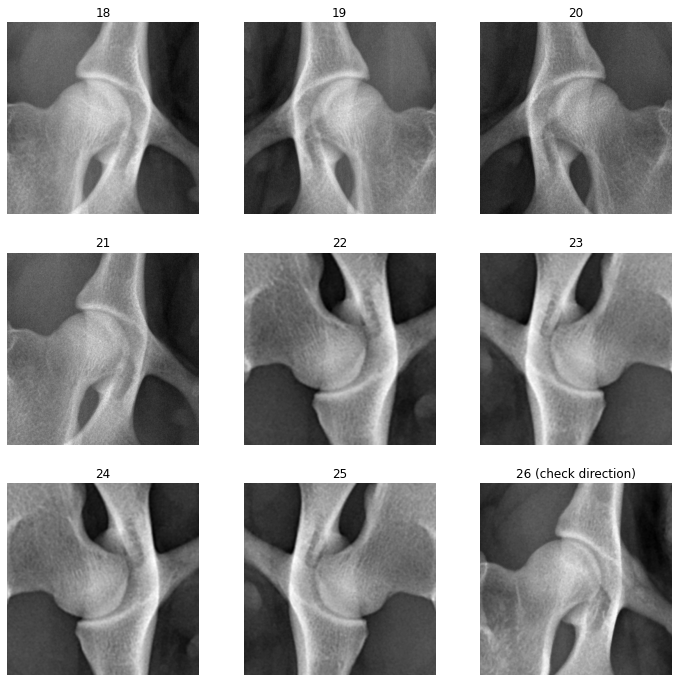

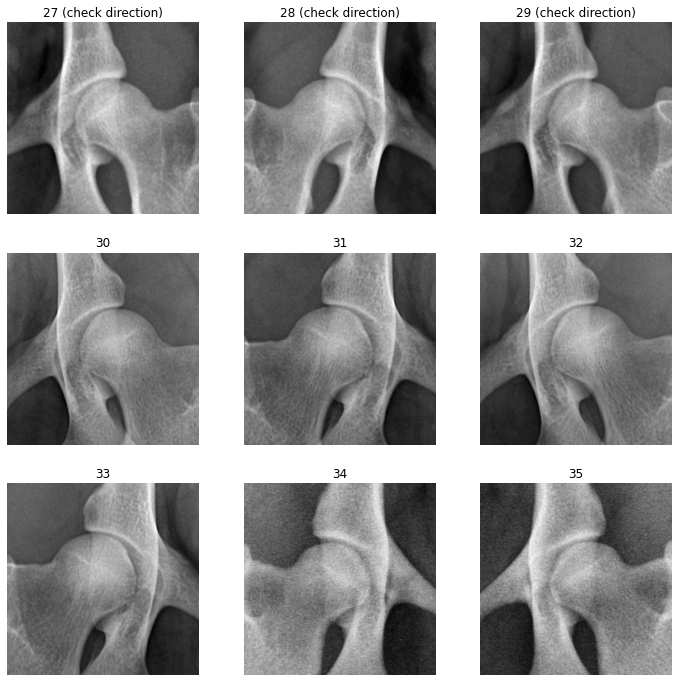

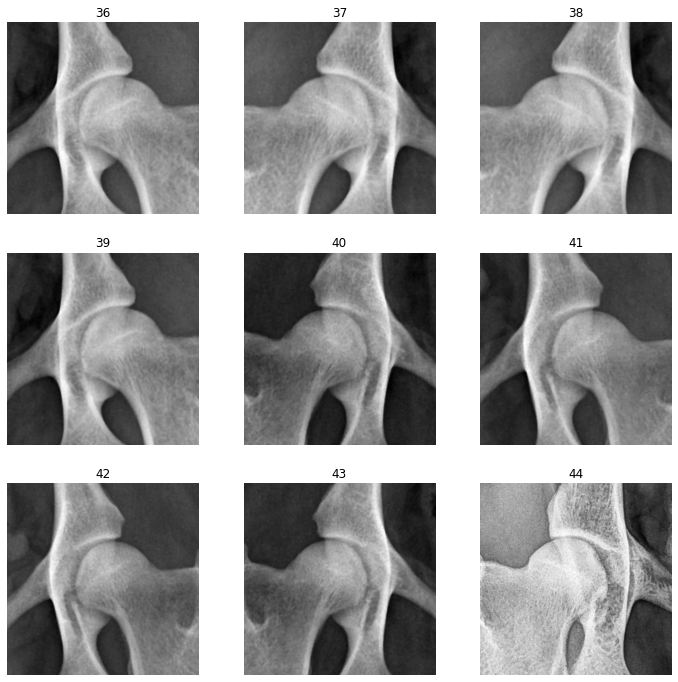

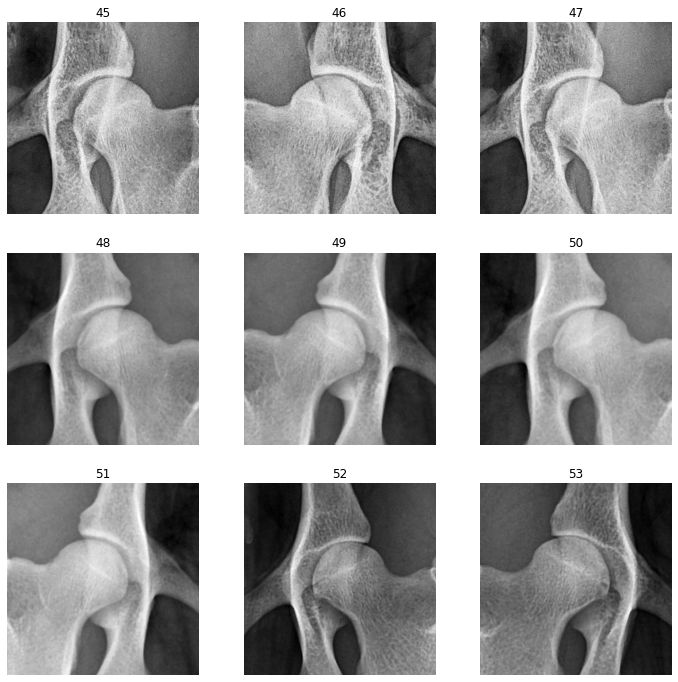

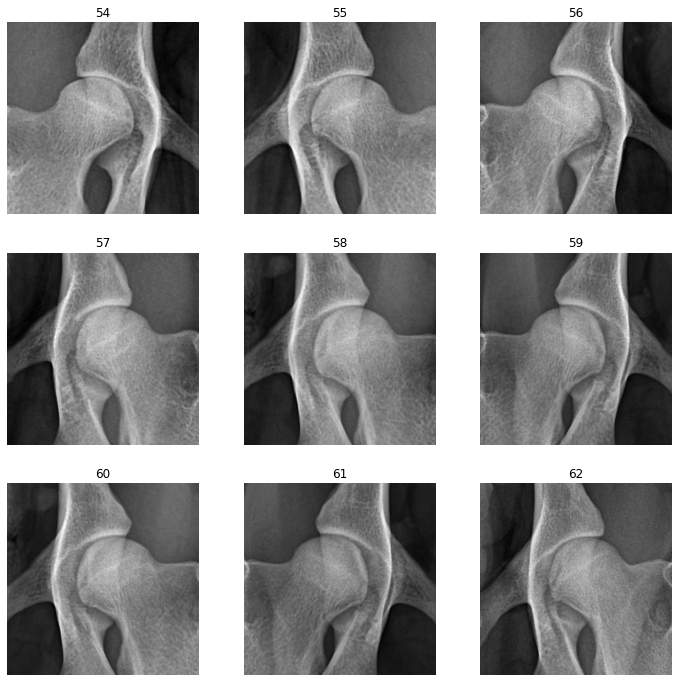

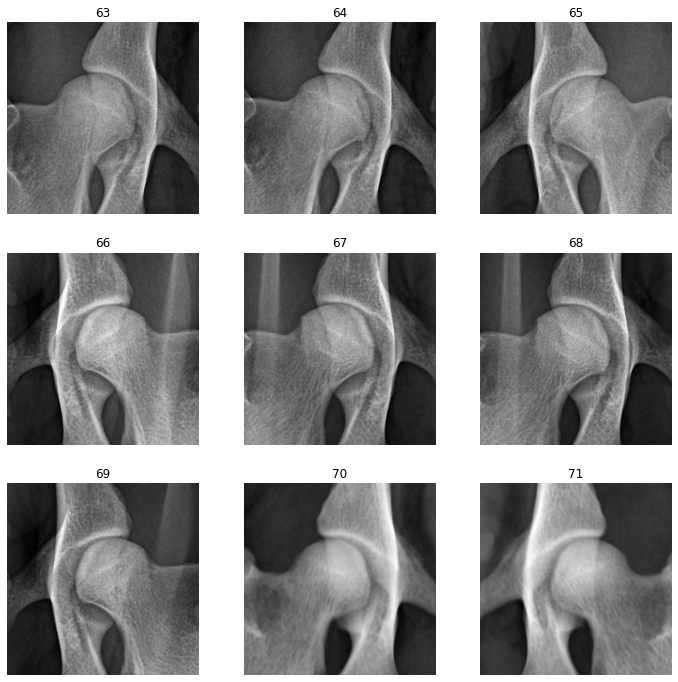

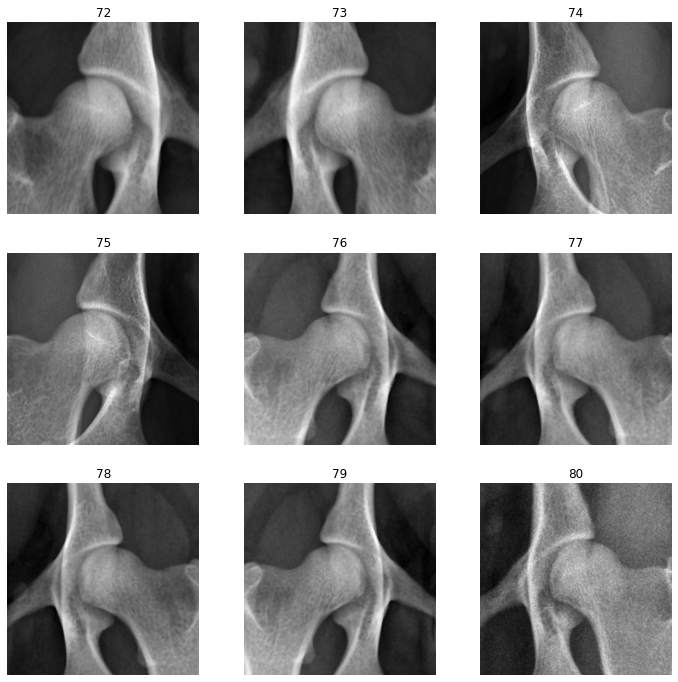

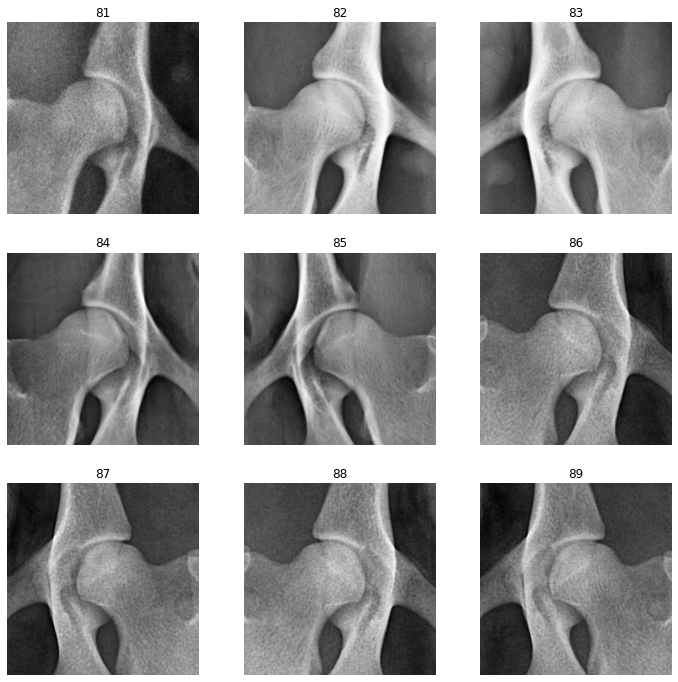

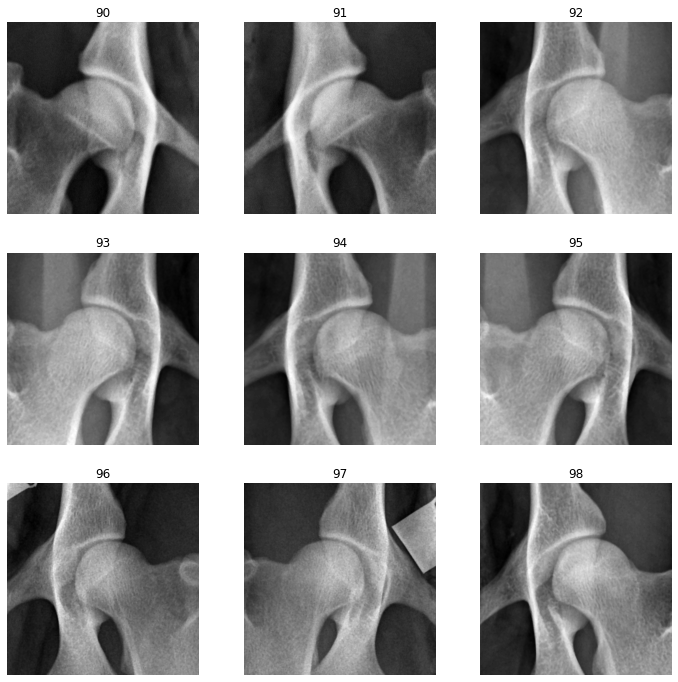

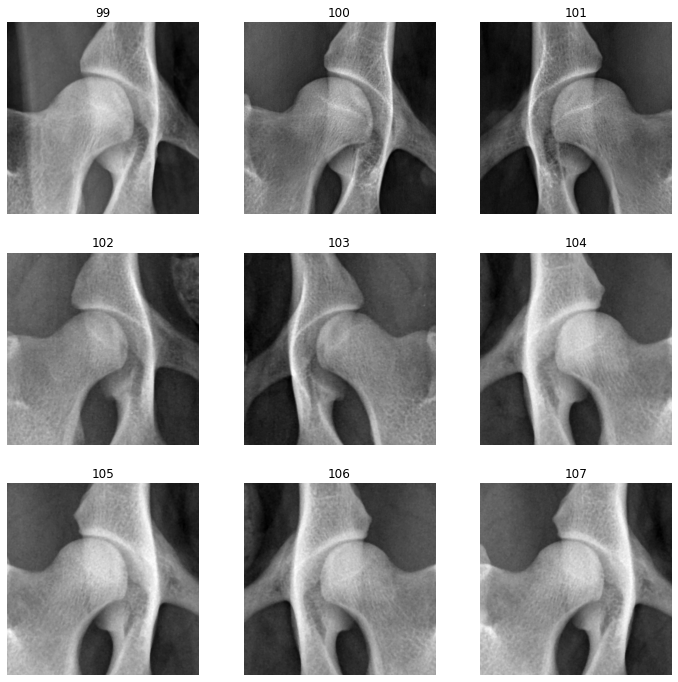

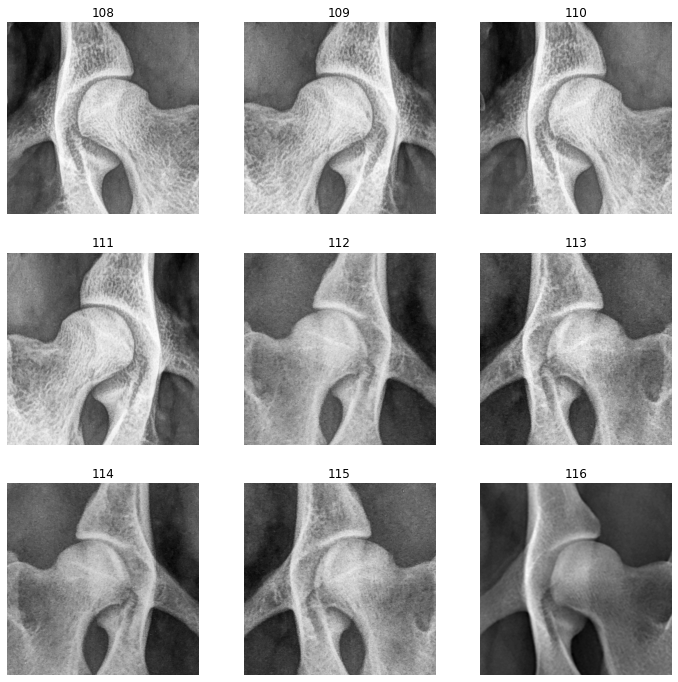

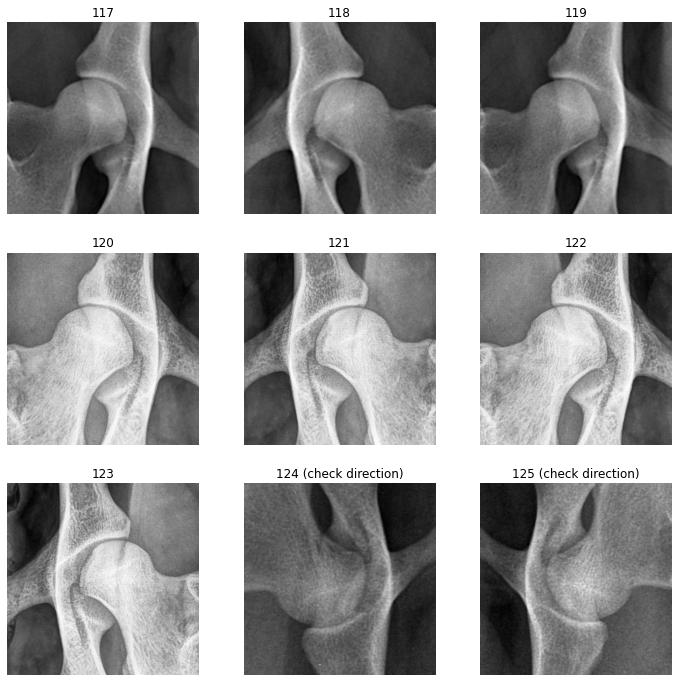

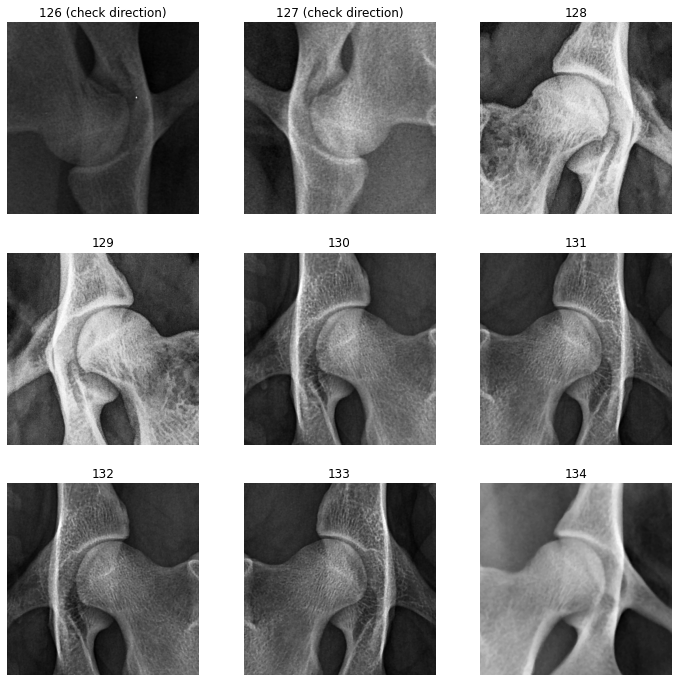

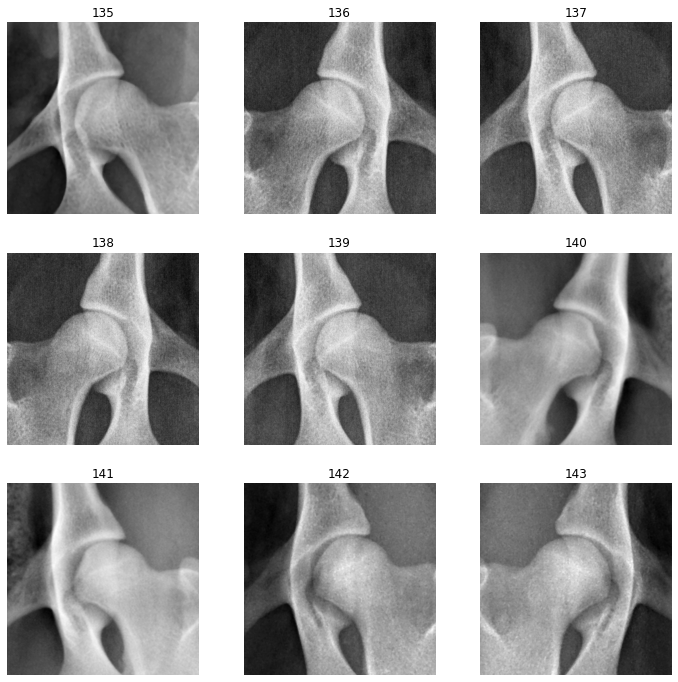

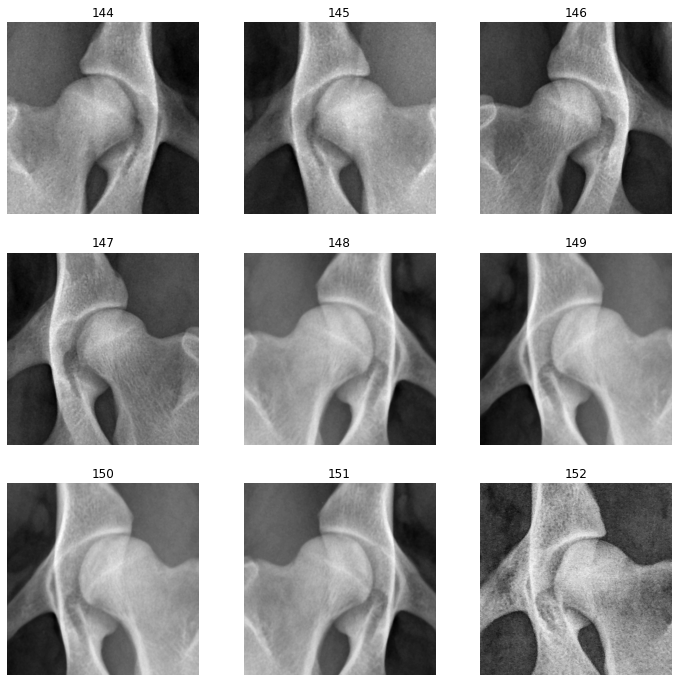

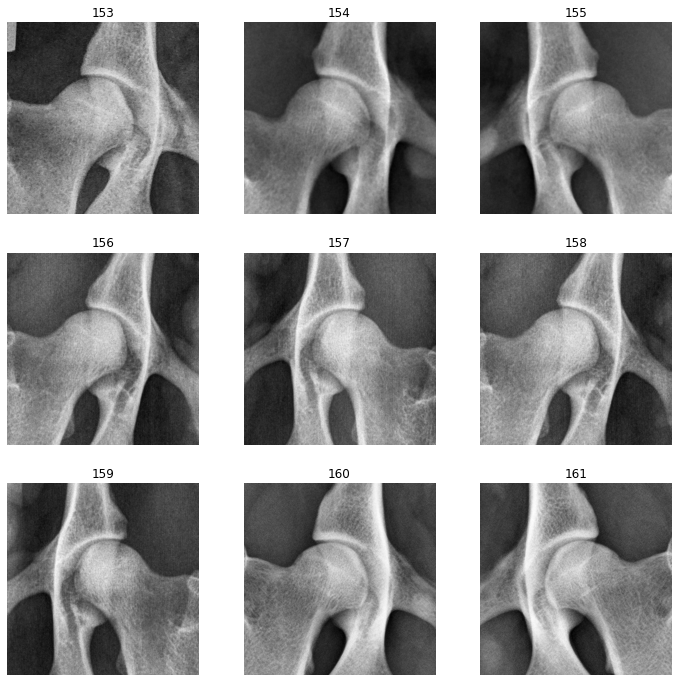

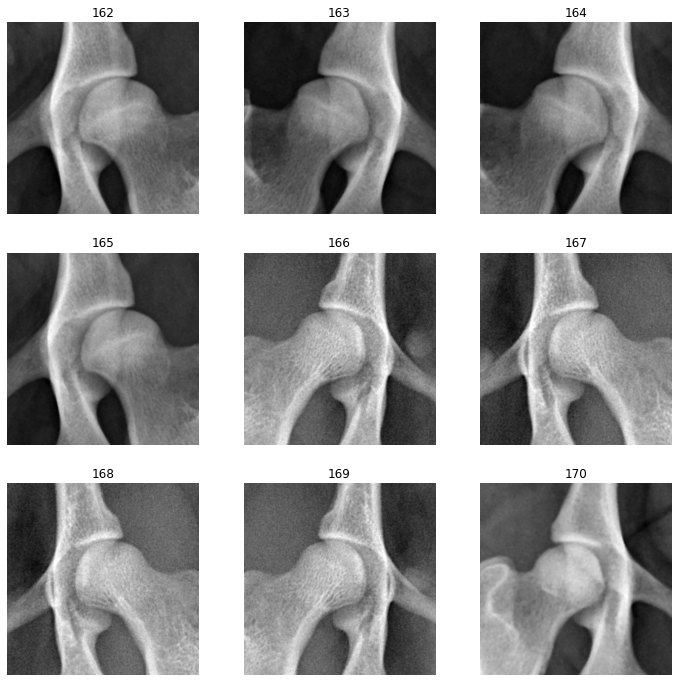

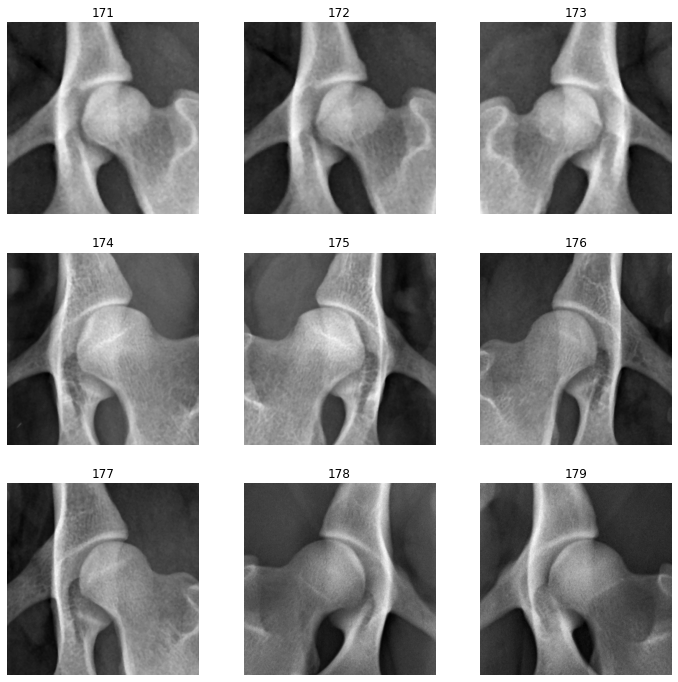

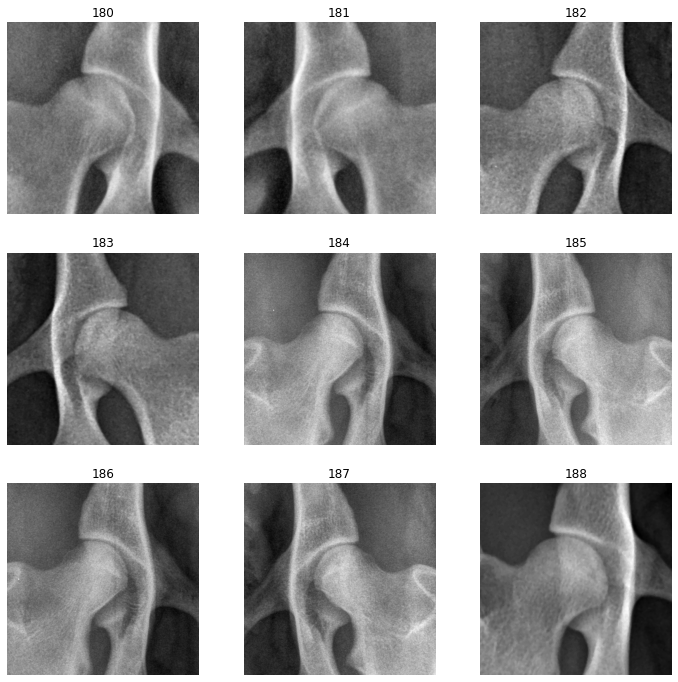

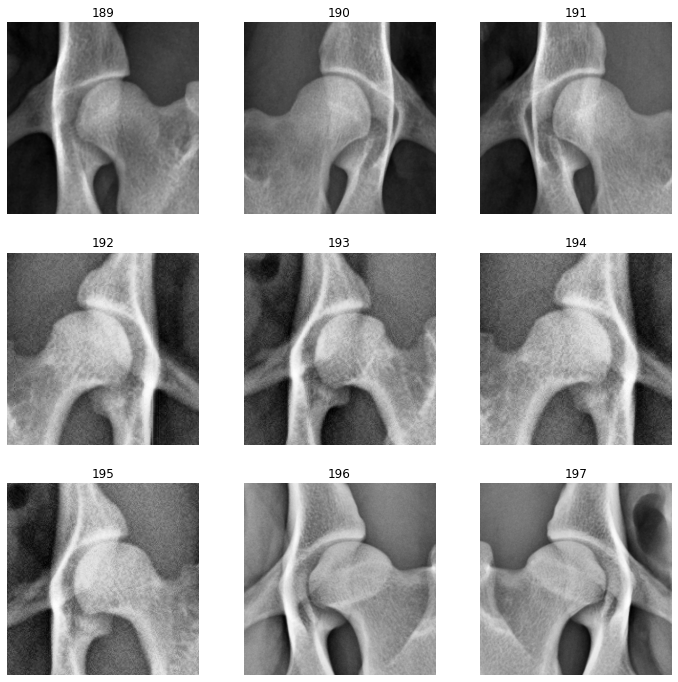

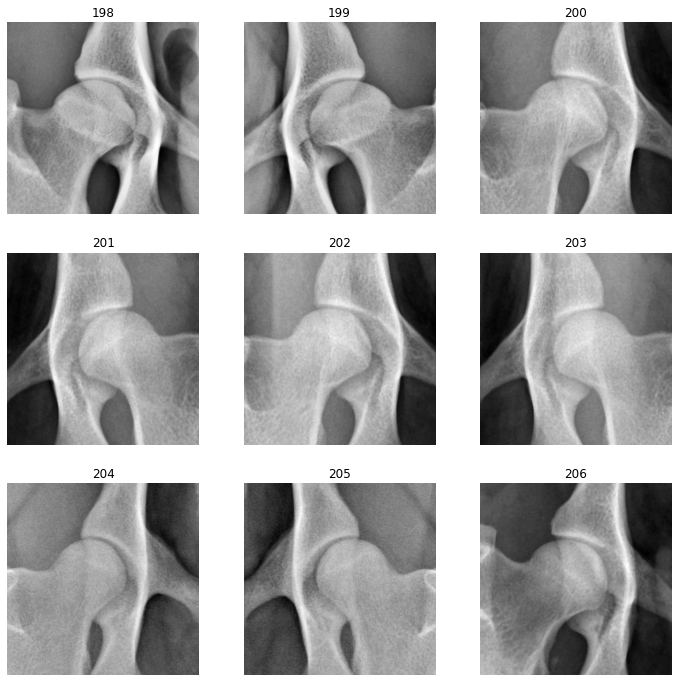

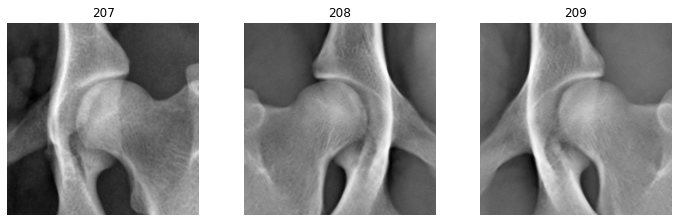

In [8]:
for id, item in detection_df.iterrows():
    fn = item['crop_name']
    img = np.load(os.path.join(saved_cropped_image,fn + '.npy'))
    suffix = ' (check direction)' if item['is_rotated'] else ''
#     parent = item['parent_name']
#     if not pd.isnull(parent):
#         img = np.load(os.path.join(saved_cropped_image, parent,fn + '.npy'))
#     else:
#         img = np.load(os.path.join(saved_cropped_image,fn + '.npy'))
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id)+suffix)

    if (id%9) == 8:
        plt.show()                    
        
plt.show()

## Assign "flipped" column before removing failed predictions

In [9]:
flipped = np.array([False] * detection_df.shape[0])
flipped_indice = [22, 23, 24, 25, 124, 125, 126, 127]
flipped[detection_df.index.isin(flipped_indice)] = True
detection_df['flipped'] = flipped

## Remove bad detection items

In [10]:
remove_indice = []
detection_df[~detection_df.index.isin(remove_indice)]

base_path  \
0    P:/CoxaAI/Sortering 3/BB   
1    P:/CoxaAI/Sortering 3/BB   
2    P:/CoxaAI/Sortering 3/BB   
3    P:/CoxaAI/Sortering 3/BB   
4    P:/CoxaAI/Sortering 3/BB   
..                        ...   
205  P:/CoxaAI/Sortering 3/BB   
206  P:/CoxaAI/Sortering 3/BB   
207  P:/CoxaAI/Sortering 3/BB   
208  P:/CoxaAI/Sortering 3/BB   
209  P:/CoxaAI/Sortering 3/BB   

                                              filename parent_name  \
0    1.3.51.0.7.3593673385.13306.49742.33483.3441.6...  1-23006207   
1    1.3.51.0.7.3593673385.13306.49742.33483.3441.6...  1-23006207   
2    1.3.51.0.7.706224279.6159.12608.37693.18964.35...  1-23006207   
3    1.3.51.0.7.706224279.6159.12608.37693.18964.35...  1-23006207   
4    1.2.840.114387.2042622560.16990.19006.40964.95...  1-23006223   
..                                                 ...         ...   
205  1.2.392.200036.9107.500.220.12246.20230127.936...  1-23009573   
206           1.2.276.0.95.17743.20230127.121153.0.dcm  1-23009599   
207           1.2.276.0.95.17743.20230127.121153.0.dcm  1-23009599   
208  1.2.392.200036.9125.9.0.4129536673.50372312.10...  1-23009656   
209  1.2.392.200036.9125.9.0.4129536673.50372312.10...  1-23009656   

                                             crop_name  ax0_min  ax0_max  \
0    1.3.51.0.7.3593673385.13306.49742.33483.3441.6...     1530     1792   
1    1.3.51.0.7.3593673385.13306.49742.33483.3441.6...     1557     1830   
2    1.3.51.0.7.706224279.6159.12608.37693.18964.35...     1668     1938   
3    1.3.51.0.7.706224279.6159.12608.37693.18964.35...     1661     1924   
4    1.2.840.114387.2042622560.16990.19006.40964.95...      829      971   
..                                                 ...      ...      ...   
205  1.2.392.200036.9107.500.220.12246.20230127.936...      856      996   
206        1.2.276.0.95.17743.20230127.121153.0.dcm_h1     1464     1613   
207        1.2.276.0.95.17743.20230127.121153.0.dcm_h2     1467     1615   
208  1.2.392.200036.9125.9.0.4129536673.50372312.10...     1268     1449   
209  1.2.392.200036.9125.9.0.4129536673.50372312.10...     1255     1424   

     ax1_min  ax1_max  confidence  is_rotated  diagnosis diagnosis_raw  \
0       2105     2295    0.967320       False          1            BB   
1       1213     1406    0.951314       False          1            BB   
2       1348     1540    0.976187       False          1            BB   
3       2240     2432    0.957437       False          1            BB   
4        950     1053    0.989528       False          1            BB   
..       ...      ...         ...         ...        ...           ...   
205     1228     1329    0.978454       False          1            BB   
206     1172     1276    0.994964       False          1            BB   
207     1718     1825    0.992304       False          1            BB   
208      847      974    0.971436       False          1            BB   
209     1432     1556    0.934253       False          1            BB   

     flipped  
0      False  
1      False  
2      False  
3      False  
4      False  
..       ...  
205    False  
206    False  
207    False  
208    False  
209    False  

[210 rows x 13 columns]

In [11]:
new_detection_df = detection_df[~detection_df.index.isin(remove_indice)]

In [12]:
new_detection_df.shape

(210, 13)

In [13]:
exclude_ids = pd.read_csv('exclude_id.csv').id.values
new_detection_df = new_detection_df[~new_detection_df.parent_name.isin(exclude_ids)]
print(new_detection_df.shape)

(210, 13)


In [14]:
new_detection_df.to_csv(filename_clean, index=False)

In [15]:
detection_df[detection_df.index.isin(remove_indice)]

Empty DataFrame
Columns: [base_path, filename, parent_name, crop_name, ax0_min, ax0_max, ax1_min, ax1_max, confidence, is_rotated, diagnosis, diagnosis_raw, flipped]
Index: []